In [1]:
import pandas as pd
import numpy as np

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## IMPORTING AND CLEANING DATA

In [12]:
data = pd.read_csv("/content/drive/MyDrive/ML Problems/Loan Predection/train_u6lujuX_CVtuZ9i (1).csv")

In [8]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [14]:
data.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [15]:
# Fill numerical columns with the mean
data['LoanAmount'].fillna(data['LoanAmount'].mean(), inplace=True)
data['Loan_Amount_Term'].fillna(data['Loan_Amount_Term'].mean(), inplace=True)
data['Credit_History'].fillna(data['Credit_History'].mean(), inplace=True)

# Fill categorical columns with the mode
data['Gender'].fillna(data['Gender'].mode()[0], inplace=True)
data['Married'].fillna(data['Married'].mode()[0], inplace=True)
data['Dependents'].fillna(data['Dependents'].mode()[0], inplace=True)
data['Self_Employed'].fillna(data['Self_Employed'].mode()[0], inplace=True)


In [16]:
data.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

# **EDA**

In [17]:
# Summary statistics for numerical columns
data.describe()

# Summary statistics for categorical columns
data.describe(include=['object'])


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
count,614,614,614,614,614,614,614,614
unique,614,2,2,4,2,2,3,2
top,LP001002,Male,Yes,0,Graduate,No,Semiurban,Y
freq,1,502,401,360,480,532,233,422


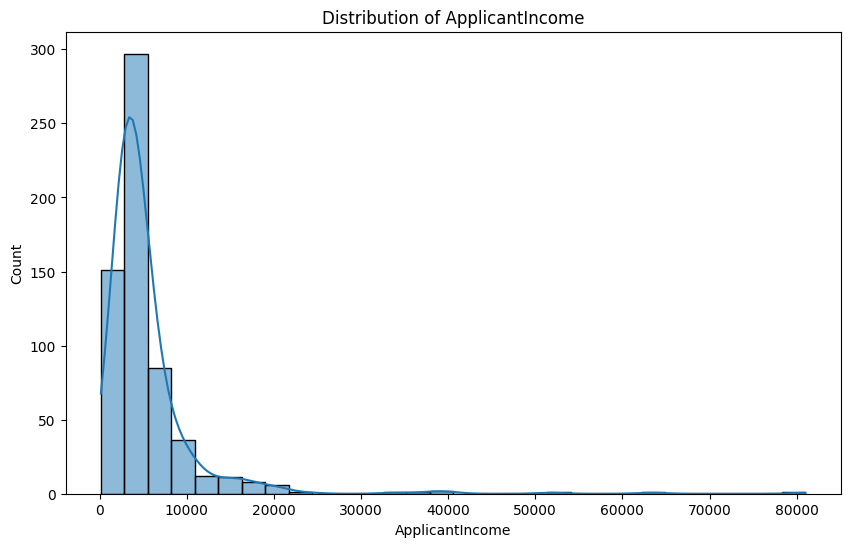

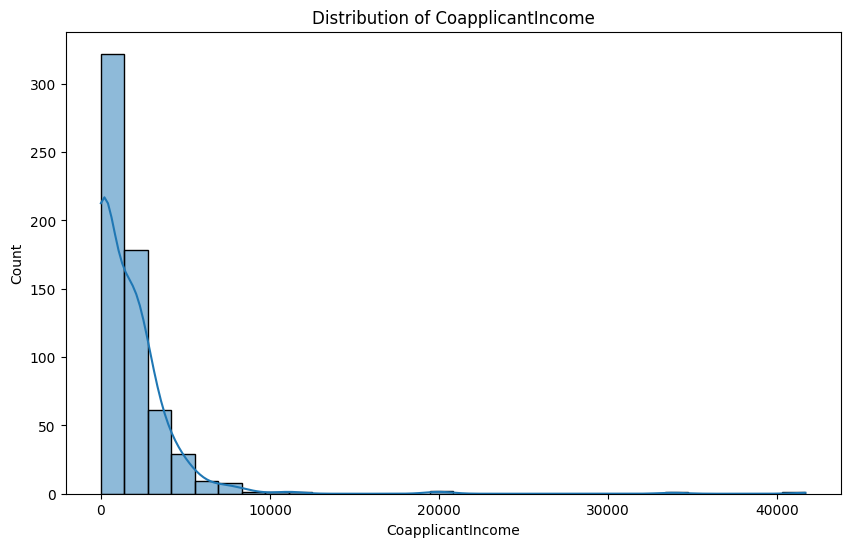

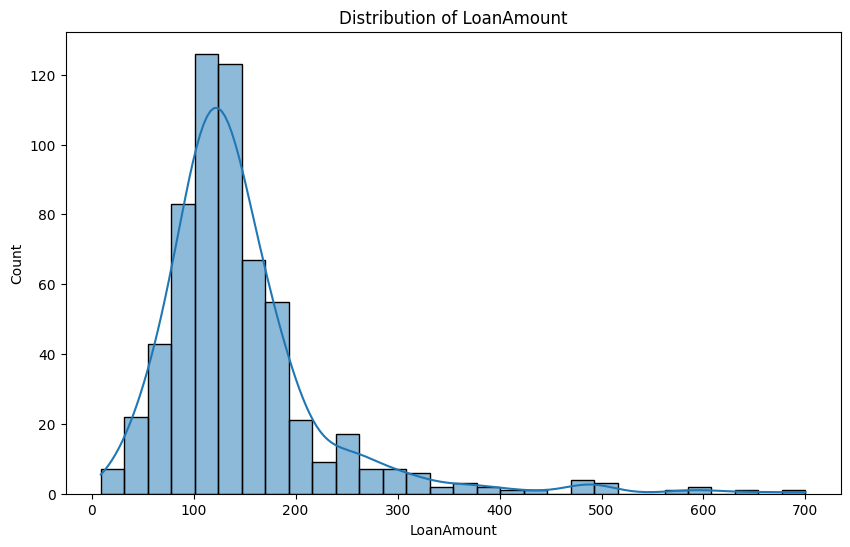

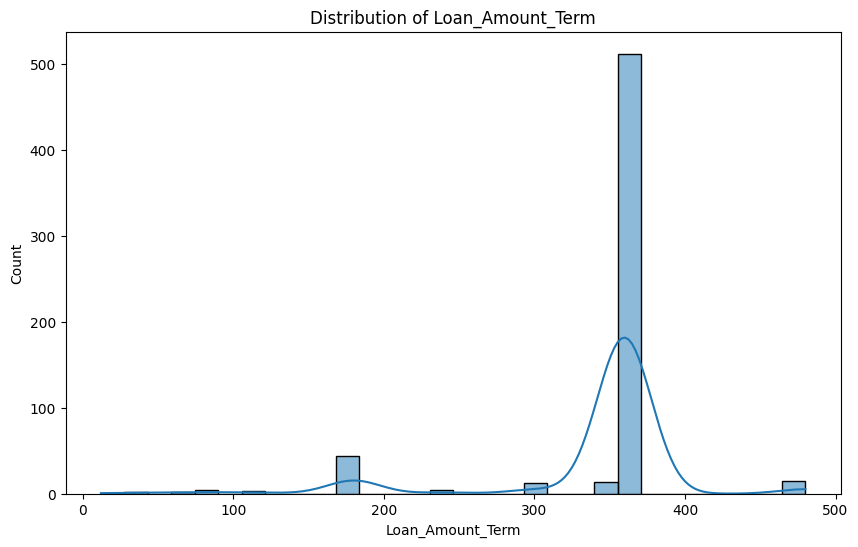

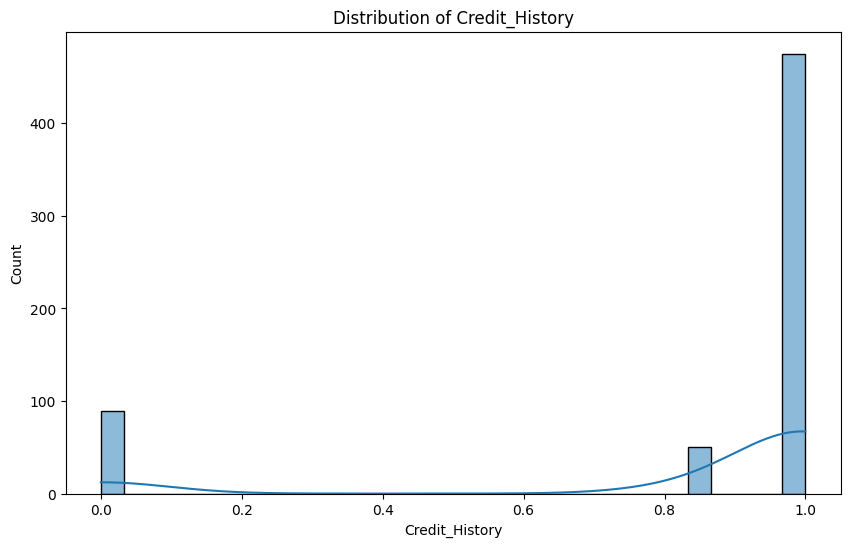

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

# Distribution plots for numerical columns
numerical_columns = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History']

for col in numerical_columns:
    plt.figure(figsize=(10, 6))
    sns.histplot(data[col], kde=True, bins=30)
    plt.title(f'Distribution of {col}')
    plt.show()


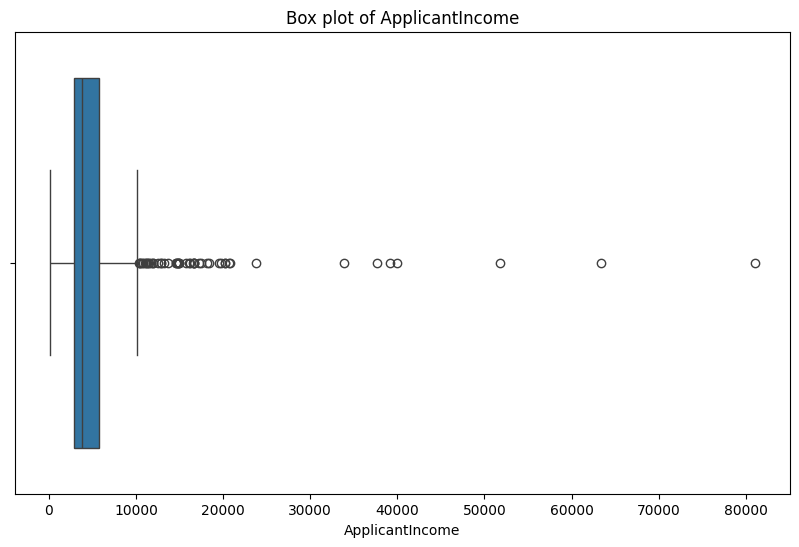

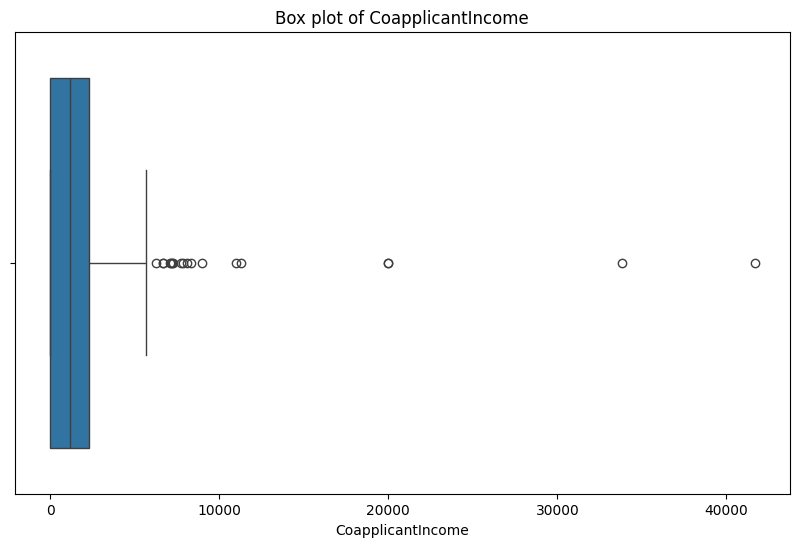

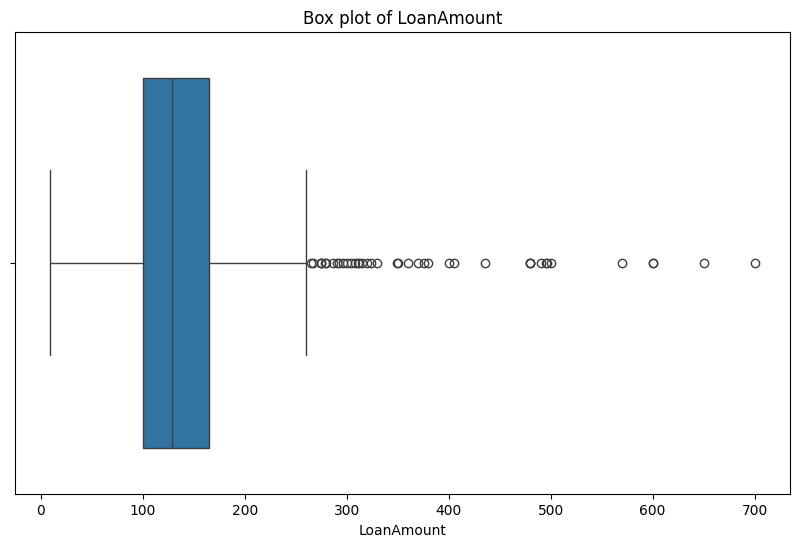

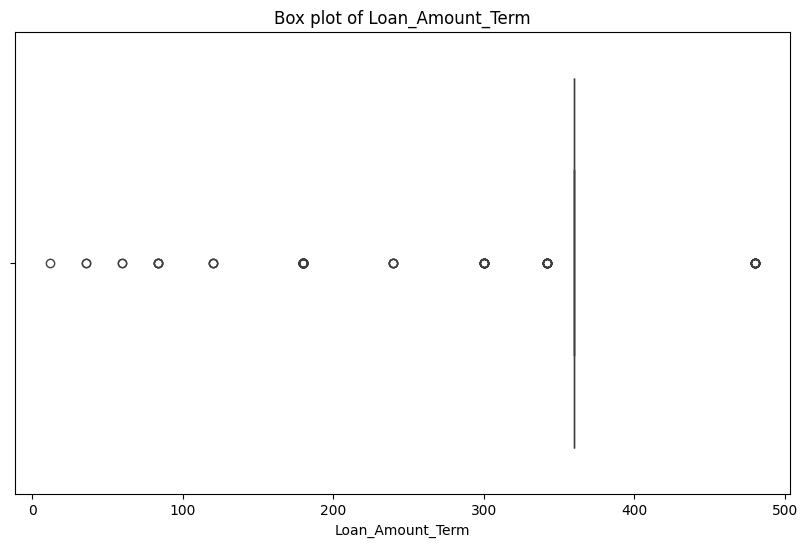

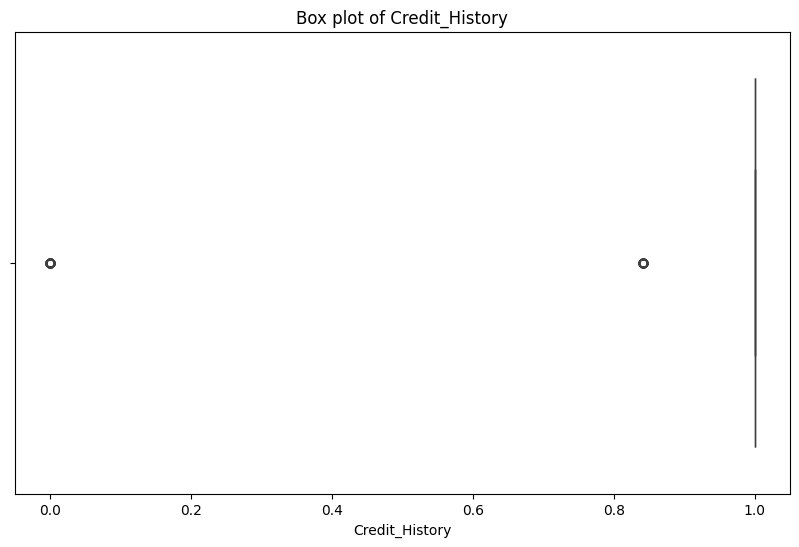

In [19]:
# Box plots for numerical columns
for col in numerical_columns:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=data[col])
    plt.title(f'Box plot of {col}')
    plt.show()


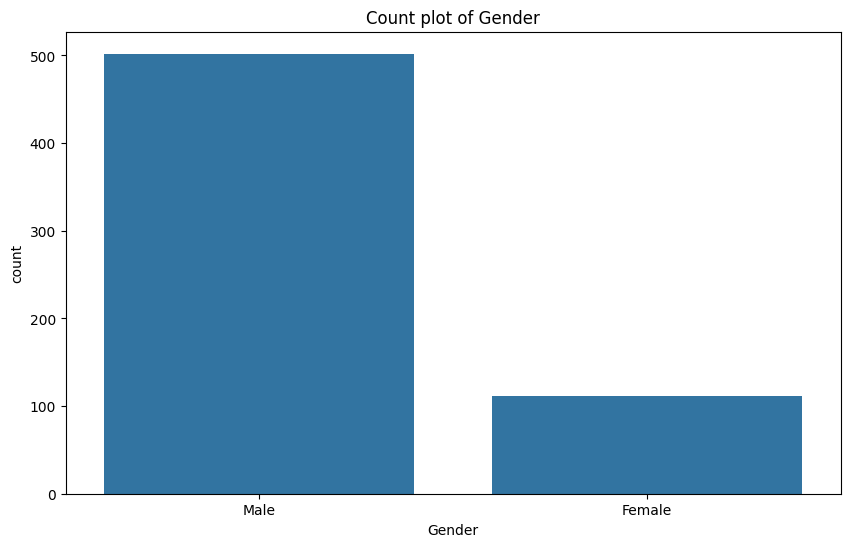

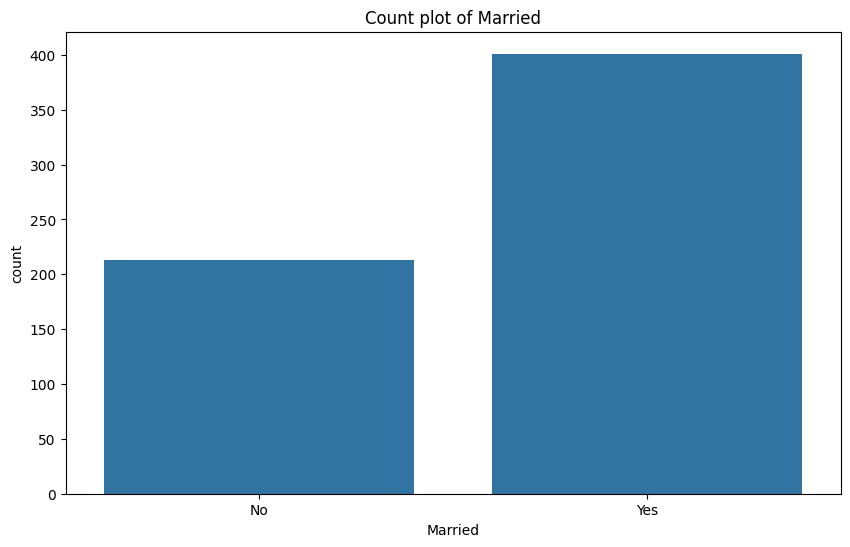

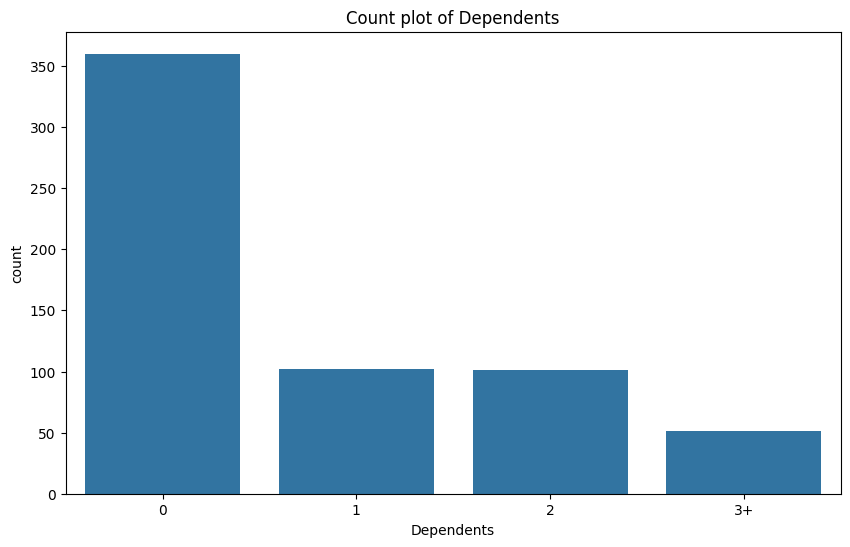

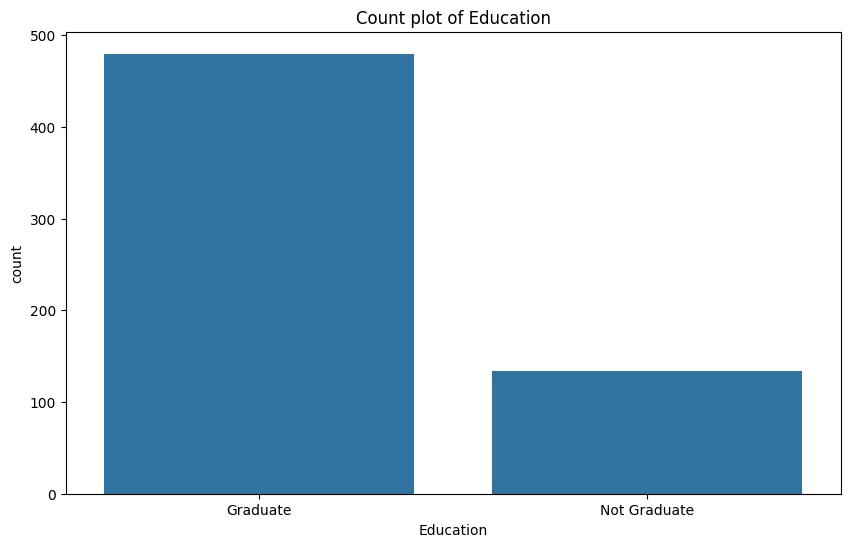

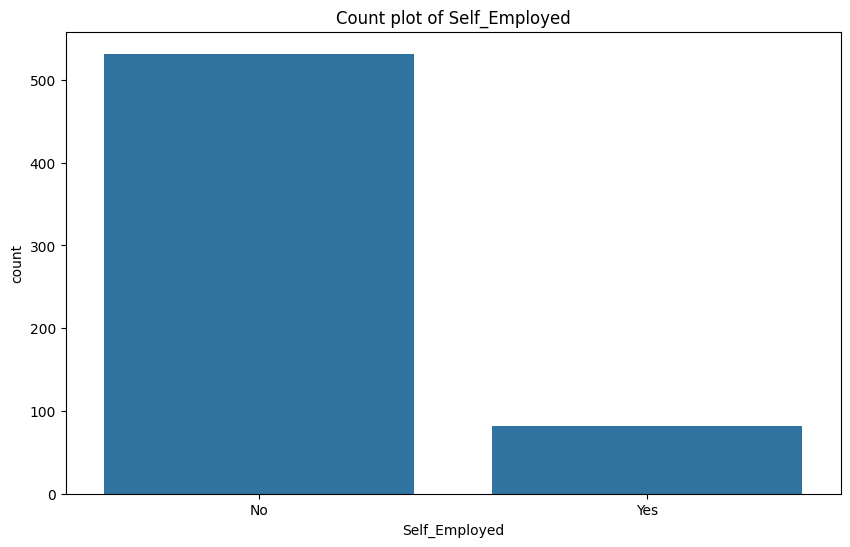

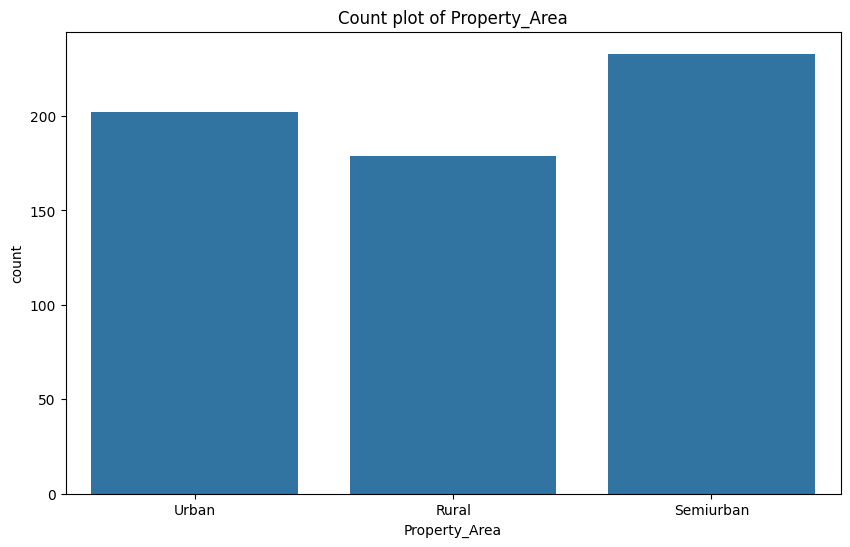

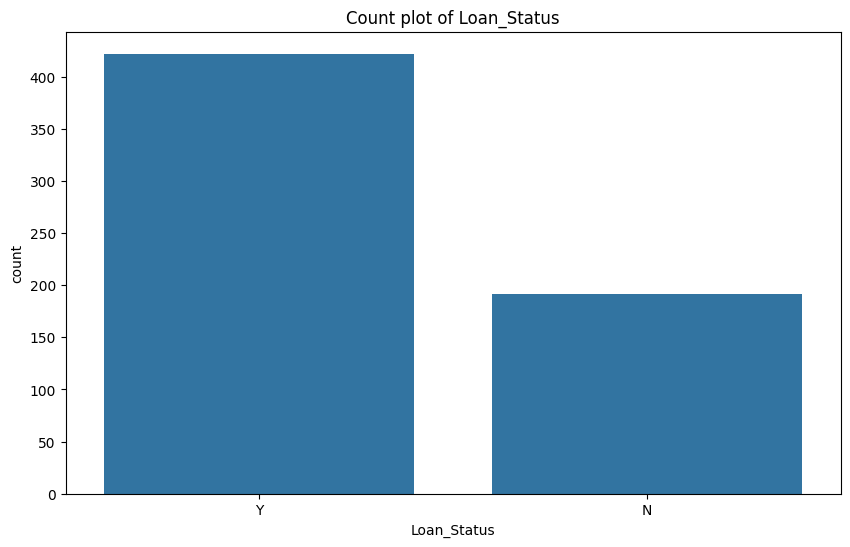

In [20]:
# Bar plots for categorical columns
categorical_columns = ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area', 'Loan_Status']

for col in categorical_columns:
    plt.figure(figsize=(10, 6))
    sns.countplot(x=data[col])
    plt.title(f'Count plot of {col}')
    plt.show()


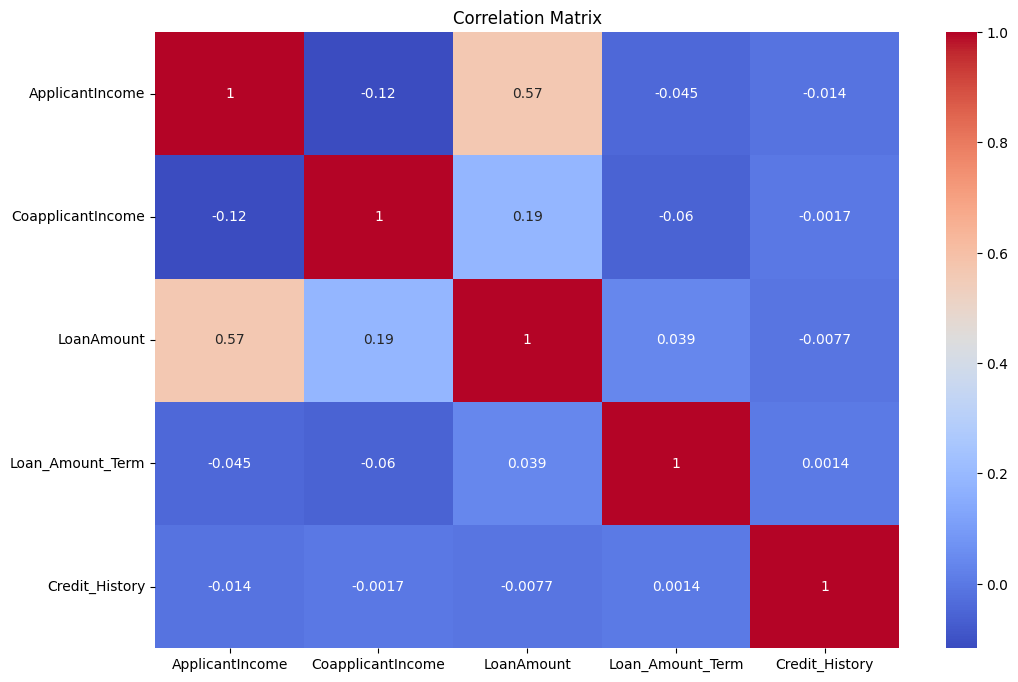

In [24]:
# Exclude non-numerical columns for correlation analysis
numerical_data = data.select_dtypes(include=['float64', 'int64'])

# Correlation matrix for numerical columns
plt.figure(figsize=(12, 8))
correlation_matrix = numerical_data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


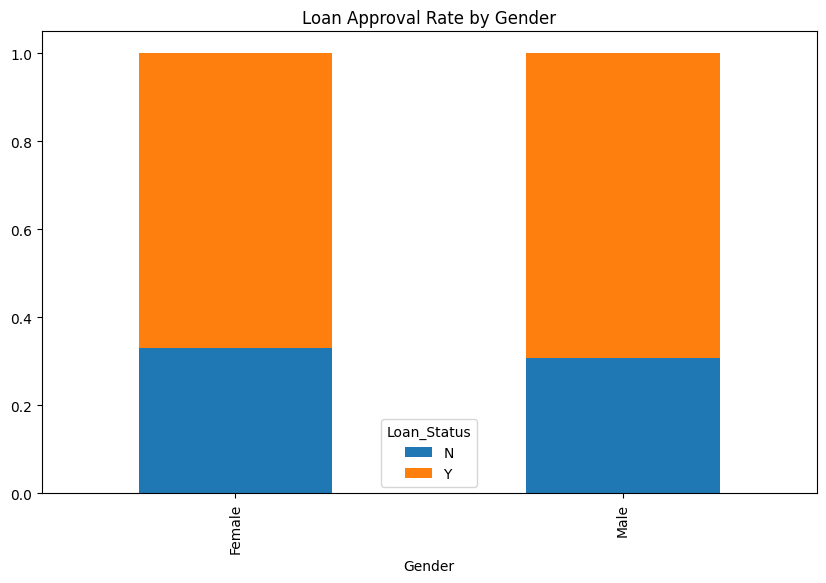

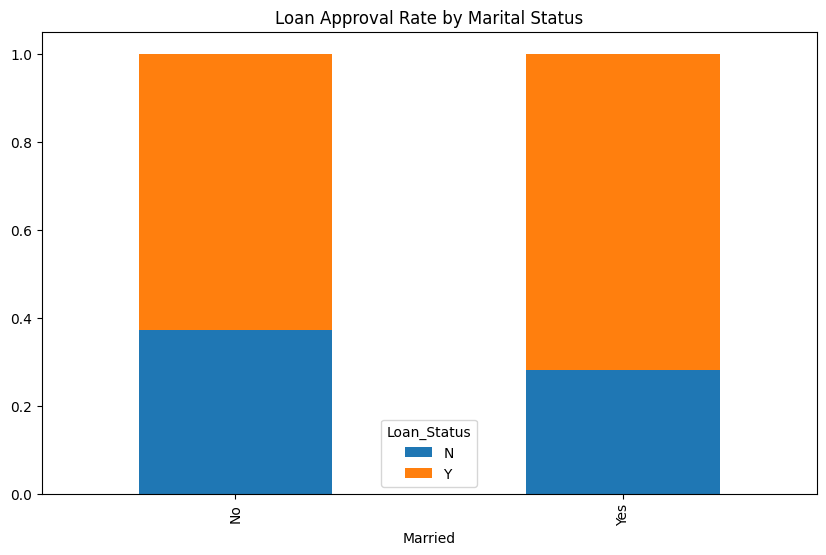

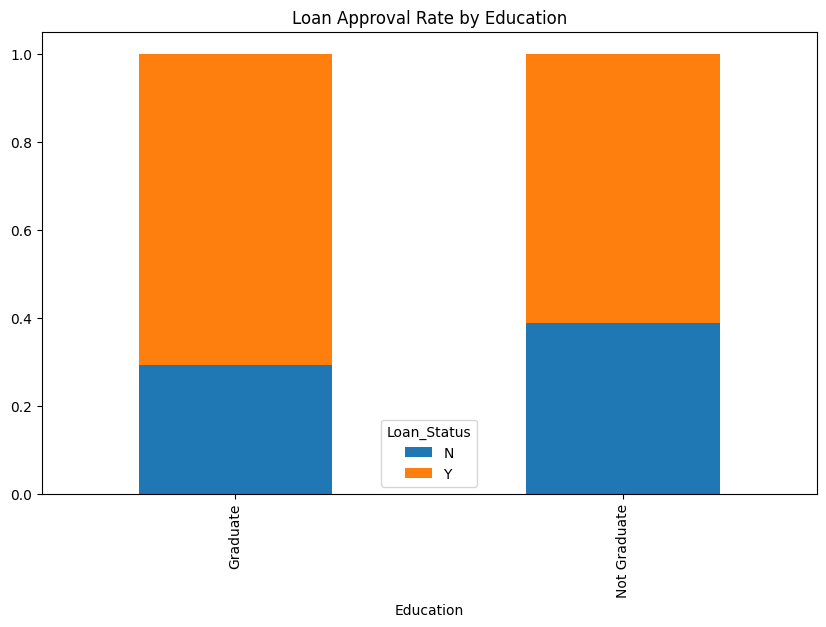

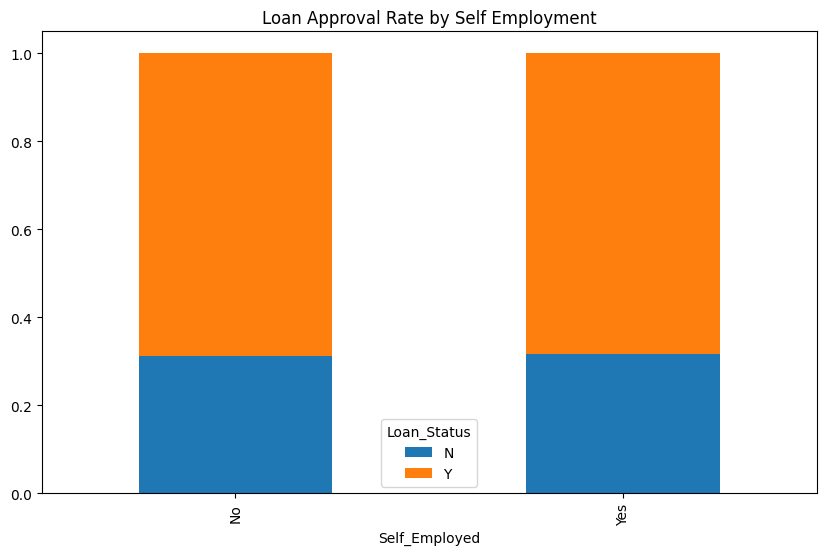

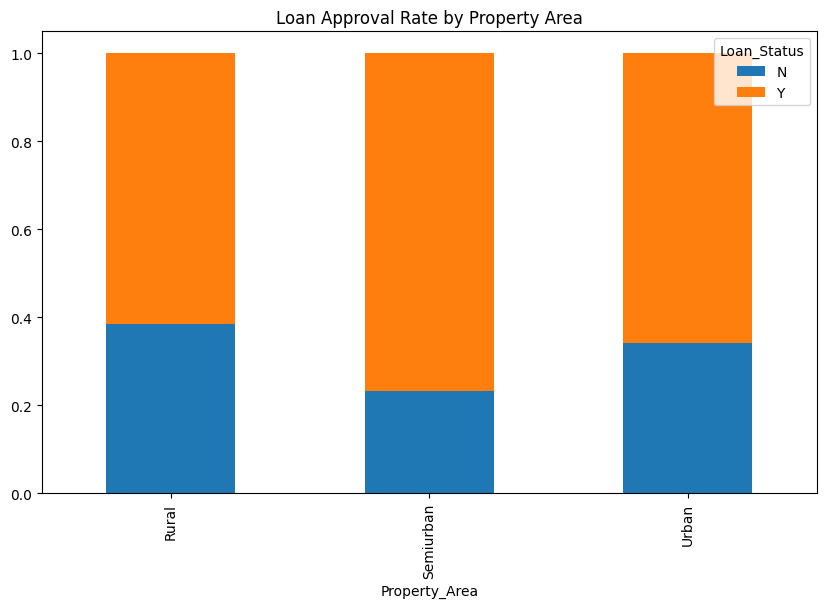

In [22]:
# Loan approval rate by different categories
approval_rate_by_gender = data.groupby('Gender')['Loan_Status'].value_counts(normalize=True).unstack()
approval_rate_by_married = data.groupby('Married')['Loan_Status'].value_counts(normalize=True).unstack()
approval_rate_by_education = data.groupby('Education')['Loan_Status'].value_counts(normalize=True).unstack()
approval_rate_by_self_employed = data.groupby('Self_Employed')['Loan_Status'].value_counts(normalize=True).unstack()
approval_rate_by_property_area = data.groupby('Property_Area')['Loan_Status'].value_counts(normalize=True).unstack()

approval_rate_by_gender.plot(kind='bar', stacked=True, figsize=(10, 6), title='Loan Approval Rate by Gender')
plt.show()
approval_rate_by_married.plot(kind='bar', stacked=True, figsize=(10, 6), title='Loan Approval Rate by Marital Status')
plt.show()
approval_rate_by_education.plot(kind='bar', stacked=True, figsize=(10, 6), title='Loan Approval Rate by Education')
plt.show()
approval_rate_by_self_employed.plot(kind='bar', stacked=True, figsize=(10, 6), title='Loan Approval Rate by Self Employment')
plt.show()
approval_rate_by_property_area.plot(kind='bar', stacked=True, figsize=(10, 6), title='Loan Approval Rate by Property Area')
plt.show()


In [23]:
# Load necessary libraries for visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Summary statistics for numerical columns
summary_stats_numerical = data.describe()

# Summary statistics for categorical columns
summary_stats_categorical = data.describe(include=['object'])

summary_stats_numerical, summary_stats_categorical


(       ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
 count       614.000000         614.000000  614.000000        614.000000   
 mean       5403.459283        1621.245798  146.412162        342.000000   
 std        6109.041673        2926.248369   84.037468         64.372489   
 min         150.000000           0.000000    9.000000         12.000000   
 25%        2877.500000           0.000000  100.250000        360.000000   
 50%        3812.500000        1188.500000  129.000000        360.000000   
 75%        5795.000000        2297.250000  164.750000        360.000000   
 max       81000.000000       41667.000000  700.000000        480.000000   
 
        Credit_History  
 count      614.000000  
 mean         0.842199  
 std          0.349681  
 min          0.000000  
 25%          1.000000  
 50%          1.000000  
 75%          1.000000  
 max          1.000000  ,
          Loan_ID Gender Married Dependents Education Self_Employed  \
 count        614

In [26]:
data.rename(columns={'Loan_Status': 'Target'}, inplace=True)

print(data.columns)

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Target'],
      dtype='object')


# **FEATURE ENGEENERING**

In [27]:
# Creating new feature TotalIncome
data['TotalIncome'] = data['ApplicantIncome'] + data['CoapplicantIncome']

# Creating new feature Income to Loan Amount Ratio
data['Income_to_Loan_Ratio'] = data['TotalIncome'] / data['LoanAmount']


In [31]:
# Binning ApplicantIncome
data['ApplicantIncomeBin'] = pd.cut(data['ApplicantIncome'], bins=[0, 2500, 4000, 6000, 81000], labels=['Low', 'Average', 'High', 'Very High'])

# Binning CoapplicantIncome
data['CoapplicantIncomeBin'] = pd.cut(data['CoapplicantIncome'], bins=[0, 1000, 3000, 42000], labels=['Low', 'Average', 'High'])

# Binning LoanAmount
data['LoanAmountBin'] = pd.cut(data['LoanAmount'], bins=[0, 100, 200, 700], labels=['Low', 'Average', 'High'])



In [32]:
# Encoding categorical features using one-hot encoding
data = pd.get_dummies(data, columns=['Gender', 'Married', 'Education', 'Self_Employed', 'Property_Area', 'ApplicantIncomeBin', 'CoapplicantIncomeBin', 'LoanAmountBin'], drop_first=True)

# Convert 'Dependents' to numerical
data['Dependents'].replace('3+', 3, inplace=True)
data['Dependents'] = data['Dependents'].astype(float)


In [33]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [34]:
data.isnull().sum()

Loan_ID                         0
Dependents                      0
ApplicantIncome                 0
CoapplicantIncome               0
LoanAmount                      0
Loan_Amount_Term                0
Credit_History                  0
Target                          0
TotalIncome                     0
Income_to_Loan_Ratio            0
Gender_Male                     0
Married_Yes                     0
Education_Not Graduate          0
Self_Employed_Yes               0
Property_Area_Semiurban         0
Property_Area_Urban             0
ApplicantIncomeBin_Average      0
ApplicantIncomeBin_High         0
ApplicantIncomeBin_Very High    0
CoapplicantIncomeBin_Average    0
CoapplicantIncomeBin_High       0
LoanAmountBin_Average           0
LoanAmountBin_High              0
dtype: int64

# **MODEL TRAINING**

In [41]:
from sklearn.model_selection import train_test_split,GridSearchCV
X = data.drop(columns=['Loan_ID', 'Target'])
y = data['Target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [42]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import precision_score

In [45]:
models = {
    'LogisticRegression': LogisticRegression(),
    'DecisionTree': DecisionTreeClassifier(),
    'RandomForest': RandomForestClassifier(),

}

params = {
    'LogisticRegression': {
        'solver': ['liblinear'],
        'C': [0.1, 1, 10]
    },
    'DecisionTree': {
        'criterion': ['gini', 'entropy'],
        'max_depth': [5, 10, 15]
    },
    'RandomForest': {
        'n_estimators': [50, 100, 200],
        'max_depth': [5, 10, 15]
    }
}

# Perform grid search for each model
best_models = {}
for model_name in models:
    clf = GridSearchCV(models[model_name], params[model_name], cv=5, scoring='precision')
    clf.fit(X_train, y_train)
    best_models[model_name] = clf.best_estimator_

# Evaluate the best models on the test set
precision_scores = {}
for model_name in best_models:
    y_pred = best_models[model_name].predict(X_test)
    precision_scores[model_name] = precision_score(y_test, y_pred, pos_label='Y')

# Display the best parameters and precision scores
for model_name in best_models:
    print(f"Best parameters for {model_name}: {best_models[model_name].get_params()}")
    print(f"Precision for {model_name}: {precision_scores[model_name]}")

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 234, in __call__
    return self._score(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 282, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py", line 1954, in precision_score
    p, _, _, _ = precision_recall_fscore_support(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py", line 1573, in precision_recall_fscore_support
    labels = _che

Best parameters for LogisticRegression: {'C': 0.1, 'class_weight': None, 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'l1_ratio': None, 'max_iter': 100, 'multi_class': 'auto', 'n_jobs': None, 'penalty': 'l2', 'random_state': None, 'solver': 'liblinear', 'tol': 0.0001, 'verbose': 0, 'warm_start': False}
Precision for LogisticRegression: 0.7383177570093458
Best parameters for DecisionTree: {'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': 5, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'random_state': None, 'splitter': 'best'}
Precision for DecisionTree: 0.7474747474747475
Best parameters for RandomForest: {'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': 5, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_spl

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 234, in __call__
    return self._score(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 282, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py", line 1954, in precision_score
    p, _, _, _ = precision_recall_fscore_support(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py", line 1573, in precision_recall_fscore_support
    labels = _che

In [46]:
for model_name in best_models:
    print(f"Best parameters for {model_name}: {best_models[model_name].get_params()}")
    print(f"Precision for {model_name}: {precision_scores[model_name]}")

Best parameters for LogisticRegression: {'C': 0.1, 'class_weight': None, 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'l1_ratio': None, 'max_iter': 100, 'multi_class': 'auto', 'n_jobs': None, 'penalty': 'l2', 'random_state': None, 'solver': 'liblinear', 'tol': 0.0001, 'verbose': 0, 'warm_start': False}
Precision for LogisticRegression: 0.7383177570093458
Best parameters for DecisionTree: {'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': 5, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'random_state': None, 'splitter': 'best'}
Precision for DecisionTree: 0.7474747474747475
Best parameters for RandomForest: {'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': 5, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_spl